# Capstone Project 1

In [1]:
import csv
import pandas as pd
import seaborn as sns

weather_data = pd.read_csv('weather.csv')
print(weather_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
temp          6276 non-null float64
location      6276 non-null object
clouds        6276 non-null float64
pressure      6276 non-null float64
rain          894 non-null float64
time_stamp    6276 non-null int64
humidity      6276 non-null float64
wind          6276 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.3+ KB
None


In [2]:
weather_data['rain'] = weather_data['rain'].fillna(value = 0)
print(weather_data)

       temp                 location  clouds  pressure    rain  time_stamp  \
0     42.42                 Back Bay    1.00   1012.14  0.1228  1545003901   
1     42.43              Beacon Hill    1.00   1012.15  0.1846  1545003901   
2     42.50        Boston University    1.00   1012.15  0.1089  1545003901   
3     42.11                   Fenway    1.00   1012.13  0.0969  1545003901   
4     43.13       Financial District    1.00   1012.14  0.1786  1545003901   
5     42.34         Haymarket Square    1.00   1012.15  0.2068  1545003901   
6     42.36                North End    1.00   1012.15  0.2088  1545003901   
7     42.21            North Station    1.00   1012.16  0.2069  1545003901   
8     42.07  Northeastern University    1.00   1012.12  0.1020  1545003901   
9     43.05            South Station    1.00   1012.12  0.1547  1545003901   
10    42.09         Theatre District    1.00   1012.13  0.1428  1545003901   
11    43.28                 Back Bay    0.81    990.81  0.0000  

In [3]:
print(weather_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
temp          6276 non-null float64
location      6276 non-null object
clouds        6276 non-null float64
pressure      6276 non-null float64
rain          6276 non-null float64
time_stamp    6276 non-null int64
humidity      6276 non-null float64
wind          6276 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.3+ KB
None


In [4]:
cab_data = pd.read_csv('cab_rides.csv')
print(cab_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
distance            693071 non-null float64
cab_type            693071 non-null object
time_stamp          693071 non-null int64
destination         693071 non-null object
source              693071 non-null object
price               637976 non-null float64
surge_multiplier    693071 non-null float64
id                  693071 non-null object
product_id          693071 non-null object
name                693071 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB
None


In [5]:
# print(cab_data.head())
cab_data.groupby('name').size()

name
Black           55095
Black SUV       55096
Lux             51235
Lux Black       51235
Lux Black XL    51235
Lyft            51235
Lyft XL         51235
Shared          51233
Taxi            55095
UberPool        55091
UberX           55094
UberXL          55096
WAV             55096
dtype: int64

In [6]:
indexNames = cab_data[cab_data['name'] == 'Taxi'].index
cab_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

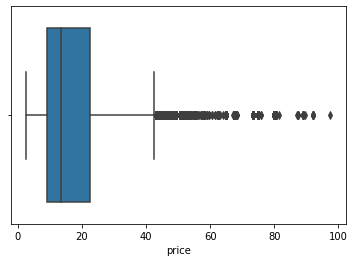

In [7]:
sns.boxplot(x=cab_data['price'])

In [8]:
print(cab_data.describe(include='all'))

             distance cab_type    time_stamp         destination  \
count   693071.000000   693071  6.930710e+05              693071   
unique            NaN        2           NaN                  12   
top               NaN     Uber           NaN  Financial District   
freq              NaN   385663           NaN               58851   
mean         2.189430      NaN  1.544046e+12                 NaN   
std          1.138937      NaN  6.891925e+08                 NaN   
min          0.020000      NaN  1.543204e+12                 NaN   
25%          1.280000      NaN  1.543444e+12                 NaN   
50%          2.160000      NaN  1.543737e+12                 NaN   
75%          2.920000      NaN  1.544828e+12                 NaN   
max          7.860000      NaN  1.545161e+12                 NaN   

                    source          price  surge_multiplier  \
count               693071  637976.000000     693071.000000   
unique                  12            NaN               N

In [9]:
taxi_data = cab_data.loc[cab_data['name'] == 'Taxi']
taxi_data = taxi_data.reset_index(drop=True)
print(taxi_data)

       distance cab_type     time_stamp              destination  \
0          1.11     Uber  1543673584211                 West End   
1          2.48     Uber  1543794776318            South Station   
2          2.94     Uber  1543523885298                   Fenway   
3          1.16     Uber  1544731816318                 West End   
4          2.67     Uber  1543583283653              Beacon Hill   
5          3.39     Uber  1543775279908            North Station   
6          3.39     Uber  1544684707241            North Station   
7          2.49     Uber  1543443967576                 Back Bay   
8          3.07     Uber  1543336943649            North Station   
9          1.57     Uber  1544711408474                North End   
10         3.20     Uber  1543281863593  Northeastern University   
11         3.61     Uber  1543417148057                 Back Bay   
12         3.05     Uber  1543691580080                   Fenway   
13         2.32     Uber  1545046211951         

In [11]:
no_taxi_cab_data = pd.concat([cab_data, taxi_data, taxi_data]).drop_duplicates(keep=False)
print(no_taxi_cab_data)

        distance cab_type     time_stamp              destination  \
0           0.44     Lyft  1544952607890            North Station   
1           0.44     Lyft  1543284023677            North Station   
2           0.44     Lyft  1543366822198            North Station   
3           0.44     Lyft  1543553582749            North Station   
4           0.44     Lyft  1543463360223            North Station   
5           0.44     Lyft  1545071112138            North Station   
6           1.08     Lyft  1543208580200  Northeastern University   
7           1.08     Lyft  1543780384677  Northeastern University   
8           1.08     Lyft  1543818482645  Northeastern University   
9           1.08     Lyft  1543315522249  Northeastern University   
10          1.08     Lyft  1543594383882  Northeastern University   
11          1.08     Lyft  1543432987778  Northeastern University   
12          1.11     Uber  1543615981179                 West End   
13          1.11     Uber  1544698

In [12]:
print(no_taxi_cab_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 10 columns):
distance            637976 non-null float64
cab_type            637976 non-null object
time_stamp          637976 non-null int64
destination         637976 non-null object
source              637976 non-null object
price               637976 non-null float64
surge_multiplier    637976 non-null float64
id                  637976 non-null object
product_id          637976 non-null object
name                637976 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 53.5+ MB
None
